# Jump-start script for Competitive Data Science @ Tel Aviv Meetup

## Data loading

In [1]:
# unzip -fo replace files if they are already exists

!unzip -fo train.csv.zip
!unzip -fo test.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                


In [2]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape, train.columns

((188318, 132),
 Index([u'id', u'cat1', u'cat2', u'cat3', u'cat4', u'cat5', u'cat6', u'cat7',
        u'cat8', u'cat9',
        ...
        u'cont6', u'cont7', u'cont8', u'cont9', u'cont10', u'cont11', u'cont12',
        u'cont13', u'cont14', u'loss'],
       dtype='object', length=132))

In [4]:
test.shape, test.columns

((125546, 131),
 Index([u'id', u'cat1', u'cat2', u'cat3', u'cat4', u'cat5', u'cat6', u'cat7',
        u'cat8', u'cat9',
        ...
        u'cont5', u'cont6', u'cont7', u'cont8', u'cont9', u'cont10', u'cont11',
        u'cont12', u'cont13', u'cont14'],
       dtype='object', length=131))

## Dataset
### Let's look at ID numbers

In [5]:
train['id'].values, test['id'].values

(array([     1,      2,      5, ..., 587630, 587632, 587633]),
 array([     4,      6,      9, ..., 587627, 587629, 587634]))

### ID's are interleaved. So, we can use it as feature to catch dependency on the order of data collection

### What are target values?

In [6]:
train['loss'].values

array([ 2213.18,  1283.6 ,  3005.09, ...,  5762.64,  1562.87,  4751.72])

In [7]:
train['loss'].mean(), train['loss'].median()

(3037.3376856699833, 2115.5699999999997)

### Probably loss is in dollars
### Let's look to the target distribution itself

In [8]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

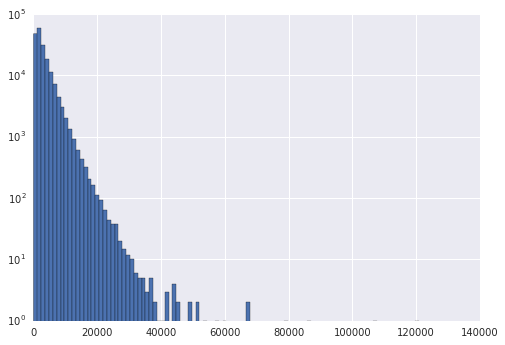

In [9]:
_ = plt.hist(train['loss'], bins = 100, log = True)

### Distribution is skewed, let's look at target logarithm

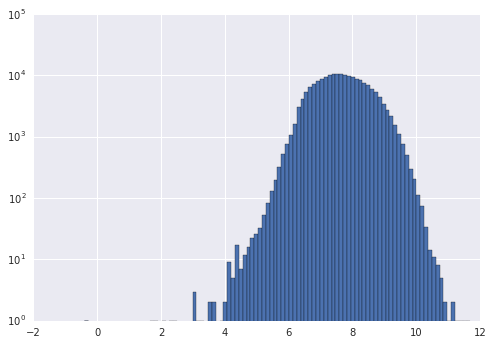

In [10]:
import numpy as np
_ = plt.hist(np.log(train['loss']), bins = 100, log = True)

### How dataset features looks like? 

In [11]:
for column in train.columns :
    if train[column].nunique() < 60 :
        print column, np.array(sorted(train[column].unique()))
    else :
        print column, train[column].nunique()

id 188318
cat1 ['A' 'B']
cat2 ['A' 'B']
cat3 ['A' 'B']
cat4 ['A' 'B']
cat5 ['A' 'B']
cat6 ['A' 'B']
cat7 ['A' 'B']
cat8 ['A' 'B']
cat9 ['A' 'B']
cat10 ['A' 'B']
cat11 ['A' 'B']
cat12 ['A' 'B']
cat13 ['A' 'B']
cat14 ['A' 'B']
cat15 ['A' 'B']
cat16 ['A' 'B']
cat17 ['A' 'B']
cat18 ['A' 'B']
cat19 ['A' 'B']
cat20 ['A' 'B']
cat21 ['A' 'B']
cat22 ['A' 'B']
cat23 ['A' 'B']
cat24 ['A' 'B']
cat25 ['A' 'B']
cat26 ['A' 'B']
cat27 ['A' 'B']
cat28 ['A' 'B']
cat29 ['A' 'B']
cat30 ['A' 'B']
cat31 ['A' 'B']
cat32 ['A' 'B']
cat33 ['A' 'B']
cat34 ['A' 'B']
cat35 ['A' 'B']
cat36 ['A' 'B']
cat37 ['A' 'B']
cat38 ['A' 'B']
cat39 ['A' 'B']
cat40 ['A' 'B']
cat41 ['A' 'B']
cat42 ['A' 'B']
cat43 ['A' 'B']
cat44 ['A' 'B']
cat45 ['A' 'B']
cat46 ['A' 'B']
cat47 ['A' 'B']
cat48 ['A' 'B']
cat49 ['A' 'B']
cat50 ['A' 'B']
cat51 ['A' 'B']
cat52 ['A' 'B']
cat53 ['A' 'B']
cat54 ['A' 'B']
cat55 ['A' 'B']
cat56 ['A' 'B']
cat57 ['A' 'B']
cat58 ['A' 'B']
cat59 ['A' 'B']
cat60 ['A' 'B']
cat61 ['A' 'B']
cat62 ['A' 'B']
cat63 [

### Most of categorical features have a small number of distinct values
### Numerical features also have not so many distinct values
### Let's encode categorical features to numbers

In [12]:
all_data = pd.concat([train, test])

In [13]:
from sklearn.preprocessing import LabelEncoder

for column in all_data :
    encoder = LabelEncoder()
    if column.startswith('cat') :
        all_data[column] = encoder.fit_transform(all_data[column])
        
all_data[:5]

,cat1,cat10,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,id,loss
0,0,0,1,6,0,0,8,4,6,9,...,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,1,2213.18
1,0,1,11,5,0,0,4,4,8,10,...,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,2,1283.60
2,0,1,11,14,0,1,4,5,7,5,...,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,5,3005.09
3,1,0,8,3,0,0,4,4,8,10,...,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,10,939.85
4,0,1,5,9,0,0,3,4,10,6,...,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,11,2763.85


In [14]:
train = all_data[:train.shape[0]]
test = all_data[train.shape[0]:]

### Hold out set for parameters tuning 

In [15]:
from sklearn.model_selection import train_test_split

train_local, validation = train_test_split(
    train, 
    test_size = 0.2, 
    random_state = 0
)

### Find the best constant result

In [16]:
from sklearn.metrics import mean_absolute_error

scores = []

for C in np.linspace(1000, 4000, 301) :
    p = np.ones(validation.shape[0]) * C
    score = mean_absolute_error(p, validation['loss'])
    scores.append((score, C))

print 'Min error: %.2f, optimal constant prediction: %.2f' % min(scores)
print 'Mean target: %.2f, median target: %.2f' % (validation['loss'].mean(), validation['loss'].median())

Min error: 1807.09, optimal constant prediction: 2110.00
Mean target: 3040.71, median target: 2114.15


## Let's try GBDT model

In [17]:
features = np.array([column for column in all_data.columns if column != 'loss'])
features

array(['cat1', 'cat10', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104',
       'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat11', 'cat110',
       'cat111', 'cat112', 'cat113', 'cat114', 'cat115', 'cat116', 'cat12',
       'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19',
       'cat2', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25',
       'cat26', 'cat27', 'cat28', 'cat29', 'cat3', 'cat30', 'cat31',
       'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38',
       'cat39', 'cat4', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44',
       'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat5', 'cat50',
       'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57',
       'cat58', 'cat59', 'cat6', 'cat60', 'cat61', 'cat62', 'cat63',
       'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat7',
       'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76',
       'cat77', 'cat78', 'cat79', 'cat8', 'cat80', 'cat81', 'cat82',
       'cat

In [18]:
from xgboost import XGBRegressor

In [19]:
model = XGBRegressor(max_depth = 6, learning_rate = 0.2, n_estimators = 1000)

In [20]:
%%time 

model.fit(
    train_local[features].values, 
    train_local['loss'].values, 
    eval_set = [(validation[features].values, validation['loss'].values)], 
    early_stopping_rounds = 5,
    verbose = False,
)

CPU times: user 1min 41s, sys: 120 ms, total: 1min 41s
Wall time: 9.1 s


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.2, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [21]:
p = model.predict(validation[features].values)

score = mean_absolute_error(p, validation['loss'])
score

1200.1755015606748

### Let's submit this result to a leaderboard

In [22]:
test.loc[:, 'loss'] = model.predict(test[features].values)

/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [23]:
test[['id', 'loss']].to_csv('xgboost_basic.csv', index = False)
!gzip -f xgboost_basic.csv

### Public leaderboard is 1181.1 (Validation 1200.1) with 1000+ place
### Let's fit again the model with the whole train set

In [24]:
# Change estimators number
# We add 10% more iterations to compensate more examples in the train set than in the train_local set
model.n_estimators = int(model.best_iteration / 0.9)
model.n_estimators

71

In [25]:
model.fit(train[features].values, train['loss'].values)

test.loc[:, 'loss'] = model.predict(test[features].values)
test[['id', 'loss']].to_csv('xgboost_basic_full.csv', index = False)
!gzip -f xgboost_basic_full.csv

### Public leaderboard is 1177.2 (Validation 1200.1). Still 1000+ place
### Let's log-transform the target. Experience shows that this helps when you need to optimize MAE error

In [26]:
# Increase iterations number and max depth, decrease learning rate. Without justification

model = XGBRegressor(max_depth = 8, learning_rate = 0.1, n_estimators = 1000, silent = False)

In [27]:
%%time 

model.fit(
    train_local[features].values, 
    np.log(train_local['loss'].values), 
    eval_set = [(
        validation[features].values, 
        np.log(validation['loss'].values)
    )], 
    early_stopping_rounds = 5,
    verbose = False,
)

CPU times: user 4min 21s, sys: 176 ms, total: 4min 21s
Wall time: 22.5 s


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=1)

In [28]:
p = np.exp(model.predict(validation[features].values))

score = mean_absolute_error(p, validation['loss'])
score

1157.0516700627627

In [29]:
validation.loc[:, 'loss_xgboost'] = p

/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [30]:
model.n_estimators = int(model.best_iteration / 0.9)
model.n_estimators

141

In [31]:
model.fit(train[features].values, np.log(train['loss'].values))
test.loc[:, 'loss'] = np.exp(model.predict(test[features].values))
test[['id', 'loss']].to_csv('xgboost_log_transform.csv', index = False)

!gzip -f xgboost_log_transform.csv

### 1130.8 (Validation 1157.0) with ~750 place, much better
## Other trick is to multiply prediction by a constant to compensate difference between MAE and MSE

In [32]:
p = validation['loss_xgboost'] 

### Let's find an optimal multiplication constant for validation set

In [33]:
scores = []
for prediction_multiplicator in np.linspace(0.95, 1.05, 101) :
    score = mean_absolute_error(p * prediction_multiplicator, validation['loss'])
    scores.append((score, prediction_multiplicator))

M = min(scores)[1]

validation.loc[:, 'loss_xgboost'] *= M
print 'Min error: %.2f, optimal prediction multiplicator: %.3f' % min(scores)

Min error: 1155.37, optimal prediction multiplicator: 1.027


In [34]:
test.loc[:, 'loss'] *= M

In [35]:
test[['id', 'loss']].to_csv('xgboost_log_transform_multiplicated.csv', index = False)
!gzip -f xgboost_log_transform_multiplicated.csv

### 1129.3 (Validation 1155.4) with ~750 place, slightly better

### Errors histogram: 

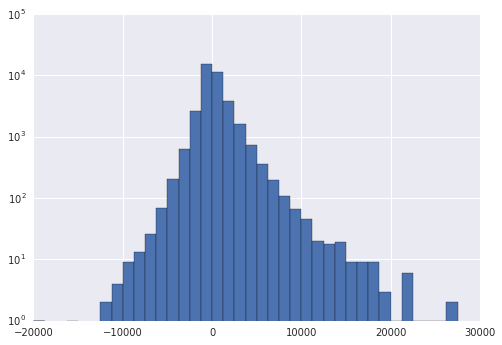

In [36]:
_ = plt.hist(
    validation['loss'] - validation.loc[:, 'loss_xgboost'], 
    bins = 40, 
    range = [-20000, 30000], 
    log = True
)

## At the competition forum we can find one more beneficial transform:
## Target offset

In [37]:
offset = 50

In [ ]:
model.n_estimators = 400

In [ ]:
%%time 

model.fit(
    train_local[features].values, 
    np.log(train_local['loss'].values + offset), 
    eval_set = [(
        validation[features].values, 
        np.log(validation['loss'].values + offset)
    )], 
    early_stopping_rounds = 15,
    verbose = False,
)

In [ ]:
p = np.exp(model.predict(validation[features].values)) - offset
p

In [ ]:
scores = []
for prediction_multiplicator in np.linspace(0.95, 1.05, 101) :
    score = mean_absolute_error(p * prediction_multiplicator, validation['loss'])
    scores.append((score, prediction_multiplicator))

M = min(scores)[1]
print 'Min error: %.2f, optimal prediction multiplicator: %.3f' % min(scores)

In [ ]:
model.n_estimators = int(model.best_iteration / 0.9)
model.n_estimators 

In [ ]:
model.fit(train[features].values, np.log(train['loss'].values + offset))

In [ ]:
test.loc[:, 'loss'] = np.exp(model.predict(test[features].values)) - offset
test.loc[:, 'loss'] *= M

test.loc[:, 'loss_xgboost'] = test.loc[:, 'loss']

In [ ]:
test[['id', 'loss']].to_csv('xgboost_log_transform_multiplicated_offset.csv', index = False)
!gzip -f xgboost_log_transform_multiplicated_offset.csv

### 1128.1 (Validation 1151.90) with ~750 place, slightly better

## Let's try other GBDT model
### You will need LightGBM executive and "pylightgbm" package to run this code

In [ ]:
import os
from pylightgbm.models import GBMRegressor
os.environ['LIGHTGBM_EXEC'] = "/root/tools/LightGBM/lightgbm"

In [ ]:
model = GBMRegressor(
    num_threads=-1,
    learning_rate = 0.03,
    num_iterations = 5000, 
    verbose = False, 
    early_stopping_round = 50,
    feature_fraction = 0.8,
    bagging_fraction = 0.8,
) 

In [ ]:
%%time 

model.fit(
    train_local[features].values, 
    np.log(train_local['loss'].values + offset), 
    test_data = [(
        validation[features].values, 
        np.log(validation['loss'].values + offset)
    )]
)

In [ ]:
p = np.exp(model.predict(validation[features].values)) - offset
p

In [ ]:
scores = []
for prediction_multiplicator in np.linspace(0.95, 1.05, 101) :
    score = mean_absolute_error(p * prediction_multiplicator, validation['loss'])
    scores.append((score, prediction_multiplicator))

M = min(scores)[1]
validation.loc[:, 'loss_lightgbm'] = p * M
print 'Min error: %.2f, optimal prediction multiplicator: %.3f' % min(scores)

In [ ]:
model = GBMRegressor(
    num_threads=-1,
    learning_rate = 0.03,
    num_iterations = int(model.best_round / 0.9), 
    verbose = False, 
    early_stopping_round = 50,
    feature_fraction = 0.8,
    bagging_fraction = 0.8,
) 

In [ ]:
model.fit(train[features].values, np.log(train['loss'].values + offset))

In [ ]:
test.loc[:, 'loss_lightgbm'] = np.exp(model.predict(test[features].values)) - offset
test.loc[:, 'loss_lightgbm'] *= M

In [ ]:
test.loc[:, 'loss'] = test['loss_lightgbm']

test[['id', 'loss']].to_csv('lightgbm_log_transform_multiplicated_offset.csv', index = False)
!gzip -f lightgbm_log_transform_multiplicated_offset.csv

### 1119.2 (Validation 1142.3) with ~550 place
## Let's try to blend two models

In [ ]:
scores = []
for alpha in np.linspace(0.1, 0.9, 9) :
    p = validation['loss_lightgbm'] * alpha + validation['loss_xgboost'] * (1 - alpha)
    score = mean_absolute_error(p, validation['loss'])
    scores.append((score, alpha))
    
print min(scores)
alpha = min(scores)[1]

In [ ]:
test.loc[:, 'loss'] = test['loss_lightgbm'] * alpha + test['loss_xgboost'] * (1 - alpha)
test[['id', 'loss']].to_csv('blending_log_transform_multiplicated_offset.csv', index = False)
!gzip -f blending_log_transform_multiplicated_offset.csv

### 1118.2 with ~500 place


## Fine tuning parameters can give you about 1114.0 score and 300 place

## Let's analyze local validation and public leaderboard: 

In [ ]:
%%html
<style>
table {float:left}
</style>

| Validation | Leaderboard   |
|------------|---------------|
| 1141.8     | 1118.2        |
| 1142.3     | 1119.2        |
| 1152.2     | 1128.1        |
| 1155.4     | 1129.3        |
| 1157.0     | 1130.8        |
| 1200.1     | 1177.2        | 

## We can see good correspondence between local and leaderboard metrics